## 📚 Disciplina: Tópicos Especiais II (C318) 

### Projeto: 
Locus - Housing Pricing Calculator

### Professor: 
Ricardo Augusto

### Alunos: 
* Alexander Augusto Silva Fernandes
* Aguinaldo de Souza Júnior
* Nathalya Stefhany Pereira
* Vanessa Swerts Esteves

## 🤖 Formulação e definição do problema de Machine Learning (ML)

1. Enquadramento do problema: Aprendizagem Supervisionada;
2. Trata-se de um problema de regressão múltipla:
    * Variável de entrada: Características de um imóvel;
    * variável de saída: preço aproximado do imóvel).
3. No futuro, poderá ter mais dados entrando na aplicação, ou seja, seria necessário o ajuste dos dados pelo treinamento online; 
4. A quantidade de dados pode ser acomodada na memória (batch learning).

## 🏗️ Estrutura do Projeto de ML

### 1. Estrutura do projeto   
* Importação das bibliotecas utilizadas
* Importação da base de dados
* Manipulações iniciais nos dados

### 2. Métodos de Amostragem (Sampling)
* Método de Amostragem Aleatória Simples (Sklearn)

### 3. Análise Exploratória de Dados
* Visualizações dos dados
* Investigando correlações

### 4. Preparação dos Dados para Modelagem 
* Limpeza dos dados
* Manipulando features categóricas
* Feature Scaling - Pipeline de transformação

### 5. Modelagem
* Treinamento do modelo
* Avaliação de desempenho com todos os dados
* Avaliação de desempenho com separação de treino e teste
* Validação cruzada

### 6. Salvando o modelo

## 1. Estrutura do Projeto

### 1.1. Importação das bibliotecas utilizadas

In [1]:
# Bibliotecas utilizadas no projeto

import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
import klib
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor

import functions

### 1.2. Importação da base de dados

Este dataset foi criado coletando dados do site de imóveis [Vivareal](https://www.vivareal.com.br/).

1. id: Identificador único do imóvel;
2. type: Tipo de imóvel (Apartamento, Casa, Casa de condomínio, etc);
3. location: Endereço completo do imóvel;
4. area: Area total do imóvel (m²);
5. bedroom: Quantidade de quartos no imóvel;
6. bathroom: Quantidade de banheiros do imóvel;
7. garage: Quantidade de vagas na garagem;
8. condominium: Valor do condomínio pago no imóvel;
9. price: Preço de venda do imóvel (R$);
10. latitude: Medida do quão distante do norte está o imóvel (quanto maior, mais ao norte o imóvel está);
11. longitude: Medida do quão distante do oeste está o imóvel (quanto maior, mais a oeste o imóvel está).

In [2]:
# Importando o dataset (.csv) dentro de um dataframe pandas
df  = pd.read_csv('../datasets/vivareal.csv')

# Informações rápidas sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4836 non-null   int64  
 1   type         4836 non-null   object 
 2   location     4836 non-null   object 
 3   area         4834 non-null   object 
 4   bedroom      3987 non-null   object 
 5   bathroom     4028 non-null   object 
 6   garage       3587 non-null   object 
 7   condominium  619 non-null    object 
 8   price        4623 non-null   object 
 9   latitude     4817 non-null   float64
 10  longitude    4817 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 415.7+ KB


### 1.3 Manipulações iniciais nos dados

In [3]:
# Criando um novo dataframe que contem apenas os imóveis da cidade de Poços de Caldas
df_pocos = df[(df['location'].str.contains('Poços de Caldas'))]
df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   object 
 4   bedroom      2284 non-null   object 
 5   bathroom     2304 non-null   object 
 6   garage       2125 non-null   object 
 7   condominium  497 non-null    object 
 8   price        2710 non-null   object 
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 254.2+ KB


In [4]:
# Convertendo variáveis númericas do datarfame de object para float

converter = functions.ObjectToNumber(df_pocos)

df_pocos['area'] = converter.areaToNumber()
df_pocos['bedroom'] = converter.bedroomToNumber()
df_pocos['bathroom'] = converter.bathroomToNumber()
df_pocos['garage'] = converter.garageToNumber()
df_pocos['condominium'] = converter.condominiumToNumber()
df_pocos['price'] = converter.priceToNumber()

df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           2712 non-null   int64  
 1   type         2712 non-null   object 
 2   location     2712 non-null   object 
 3   area         2710 non-null   float64
 4   bedroom      2284 non-null   float64
 5   bathroom     2304 non-null   float64
 6   garage       2125 non-null   float64
 7   condominium  497 non-null    float64
 8   price        2710 non-null   float64
 9   latitude     2709 non-null   float64
 10  longitude    2709 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 254.2+ KB


<ipython-input-4-06f2f6ca5775>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['area'] = converter.areaToNumber()
<ipython-input-4-06f2f6ca5775>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pocos['bedroom'] = converter.bedroomToNumber()
<ipython-input-4-06f2f6ca5775>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [5]:
# Removenvendo as variaveis id, location e condominium, pois não farão parte da análise
df_pocos = df_pocos.drop(['id', 'location', 'condominium'], axis=1)
df_pocos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2712 entries, 1426 to 4693
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       2712 non-null   object 
 1   area       2710 non-null   float64
 2   bedroom    2284 non-null   float64
 3   bathroom   2304 non-null   float64
 4   garage     2125 non-null   float64
 5   price      2710 non-null   float64
 6   latitude   2709 non-null   float64
 7   longitude  2709 non-null   float64
dtypes: float64(7), object(1)
memory usage: 190.7+ KB


In [6]:
# Descrição estatística do dataframe Pandas
df_stats = df_pocos.describe()
df_stats

,area,bedroom,bathroom,garage,price,latitude,longitude
count,2.710000e+03,2284.000000,2304.000000,2125.000000,2.710000e+03,2709.000000,2709.000000
mean,2.386523e+04,2.615149,1.922309,2.029647,5.576502e+05,-21.708096,-46.262234
std,1.012329e+06,0.896461,1.287755,1.658899,1.006638e+06,5.910862,4.268142
min,0.000000e+00,1.000000,1.000000,1.000000,7.500000e+02,-33.041126,-99.188642
25%,7.200000e+01,2.000000,1.000000,1.000000,2.500000e+05,-22.118815,-46.587752
50%,1.140000e+02,3.000000,2.000000,2.000000,3.600000e+05,-21.808696,-46.576769
75%,2.400000e+02,3.000000,2.000000,2.000000,5.950000e+05,-21.808696,-46.576769
max,5.241111e+07,26.000000,26.000000,24.000000,2.650000e+07,45.770259,8.543312


### Baseado nos dados estatísticos acima, podemos observar os seguintes exemplos:
* 25% dos imóveis possuem 2 quartos, 1 banheiro, 1 vaga na garagem e 72 m² de area total 
* 50% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 114 m² de area total 
* 75% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 254 m² de area total

In [7]:
# Verificando a variável categórica type
property_types = df_pocos["type"].value_counts()
property_types

Apartamento                1326
Casa                        909
Lote/Terreno                390
Chácara                      21
Fazenda/Sítio/Chácara        16
Sala/Conjunto                14
Galpão/Depósito/Armazém      13
Ponto                         7
Cobertura                     7
Flat                          2
Portal                        2
Sobrado                       2
Prédio/Edificio               1
Imóvel                        1
Hotel/Motel/Pousada           1
Name: type, dtype: int64

In [8]:
# Pegando apenas os imóveis que tem tipo igual a Casa ou Apartamento
df_pocos = df_pocos[(df_pocos['type'] == 'Casa') | (df_pocos['type'] == 'Apartamento')]
df_pocos["type"].value_counts()

Apartamento    1326
Casa            909
Name: type, dtype: int64

<ipython-input-9-6f3d04e14aa1>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_pocos.hist(ax=ax, bins = 40)


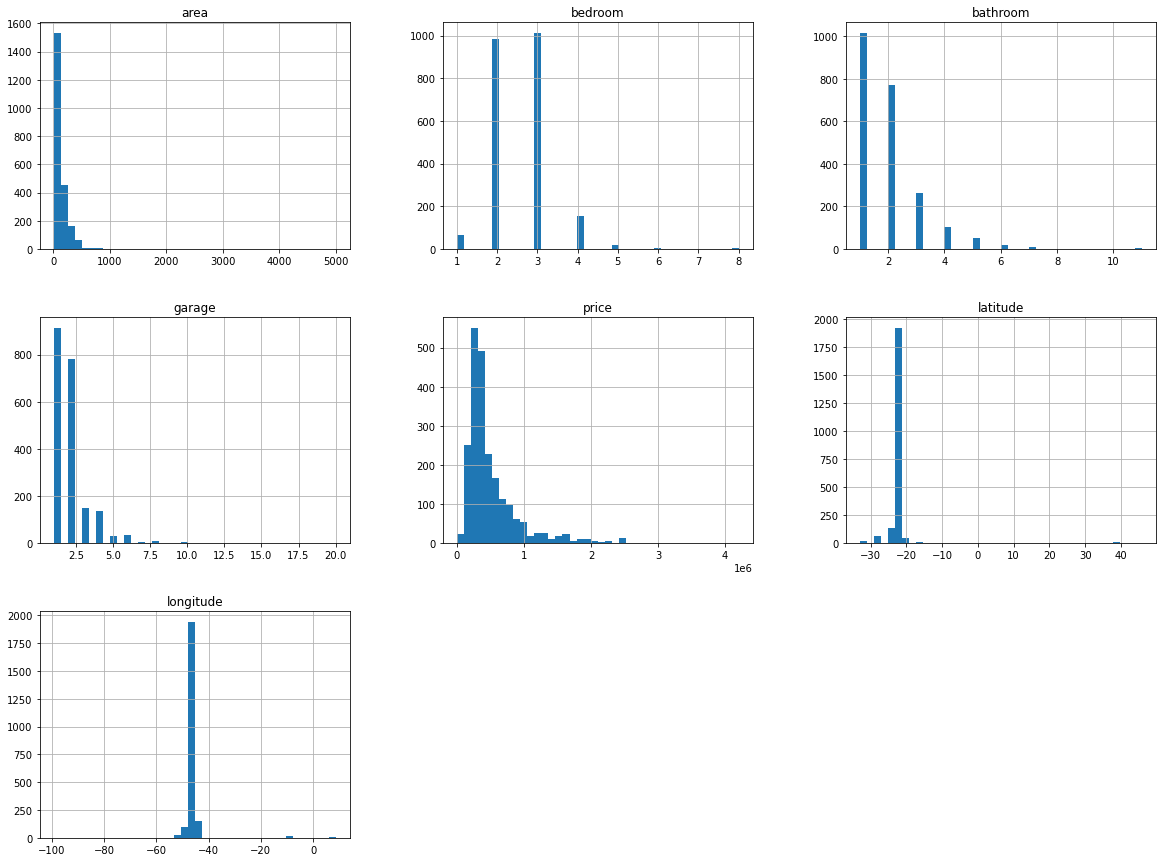

<AxesSubplot:xlabel='garage', ylabel='Density'>

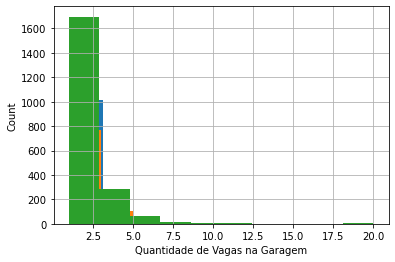

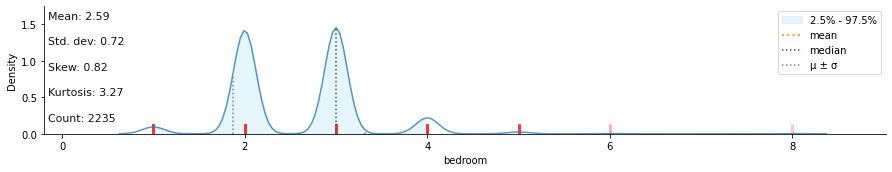

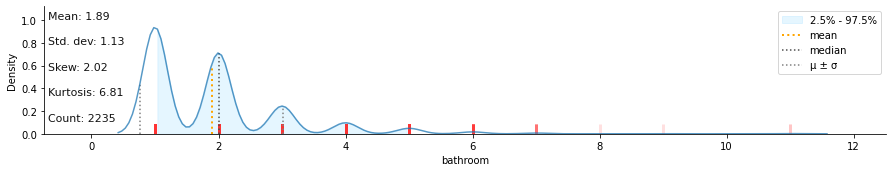

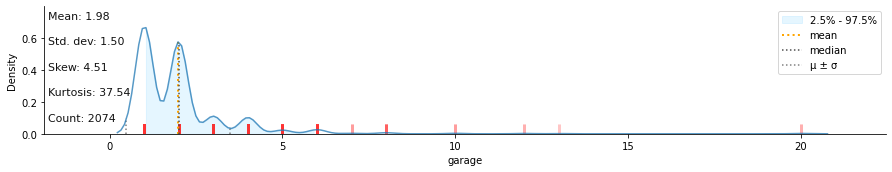

In [9]:
# Configurações relacionadas ao tamanho dos gráficos
fig = plt.figure(figsize = (20,15))
ax = fig.gca()

# Visualizando histogramas de todas as variáveis do dataframe
df_pocos.hist(ax=ax, bins = 40)
plt.show()

# Visualizando histogramas das variáveis (features) do dataframe
df_pocos['bedroom'].hist()
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Count')

df_pocos['bathroom'].hist()
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Count')

df_pocos['garage'].hist()
plt.xlabel('Quantidade de Vagas na Garagem')
plt.ylabel('Count')

# Plotando os gráficos utilizando a biblioteca klib
klib.dist_plot(df_pocos['bedroom'])
klib.dist_plot(df_pocos['bathroom'])
klib.dist_plot(df_pocos['garage'])

## 2. Métodos de Amostragem (Sampling)

### 2.1. Método de Amostragem Aleatória Simples (Scikit-Learn)

In [10]:
# Criação de conjuntos de dados de treino e teste
train_set, test_set = train_test_split(df_pocos, test_size = 0.2, random_state = 42)
print(train_set.info())
print(test_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 3176 to 2667
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       1788 non-null   object 
 1   area       1788 non-null   float64
 2   bedroom    1788 non-null   float64
 3   bathroom   1788 non-null   float64
 4   garage     1661 non-null   float64
 5   price      1788 non-null   float64
 6   latitude   1787 non-null   float64
 7   longitude  1787 non-null   float64
dtypes: float64(7), object(1)
memory usage: 125.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 4488 to 4598
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   type       447 non-null    object 
 1   area       447 non-null    float64
 2   bedroom    447 non-null    float64
 3   bathroom   447 non-null    float64
 4   garage     413 non-null    float64
 5   price      447 non-null    float64
 6  

## 3. Análise Exploratória de Dados

### 3.1. Visualizações dos dados

No handles with labels found to put in legend.


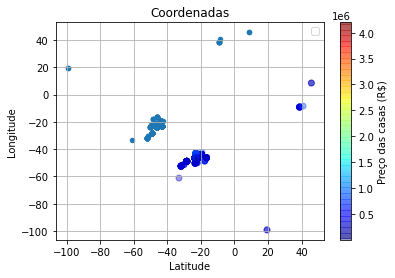

In [11]:
# Copiando os dados de treino para um dataframe pandas
train_set_df = pd.DataFrame(train_set)

# Criando gráfico de dispersão para visualização dos dados de treino (latitude e longitude)
train_set_df.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

x = train_set_df['latitude']
y = train_set_df['longitude']

prices  = train_set_df['price']
scatter = plt.scatter(x, y, alpha = 0.4, c = prices, cmap='jet')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Coordenadas')
plt.colorbar(label='Preço das casas (R$)')
plt.grid()
plt.legend()


### 3.2. Investigando correlações

In [12]:
# Criando a matriz de correlação das features do dataframe
correlation_matrix = train_set_df.corr()
correlation_matrix

,area,bedroom,bathroom,garage,price,latitude,longitude
area,1.000000,0.447675,0.366089,0.501445,0.502783,-0.004698,-0.004550
bedroom,0.447675,1.000000,0.495185,0.435091,0.566592,-0.012248,-0.000177
bathroom,0.366089,0.495185,1.000000,0.416932,0.618355,0.000253,-0.000250
garage,0.501445,0.435091,0.416932,1.000000,0.528112,0.018582,0.000027
price,0.502783,0.566592,0.618355,0.528112,1.000000,-0.008520,-0.005600
latitude,-0.004698,-0.012248,0.000253,0.018582,-0.008520,1.000000,0.675821
longitude,-0.004550,-0.000177,-0.000250,0.000027,-0.005600,0.675821,1.000000


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

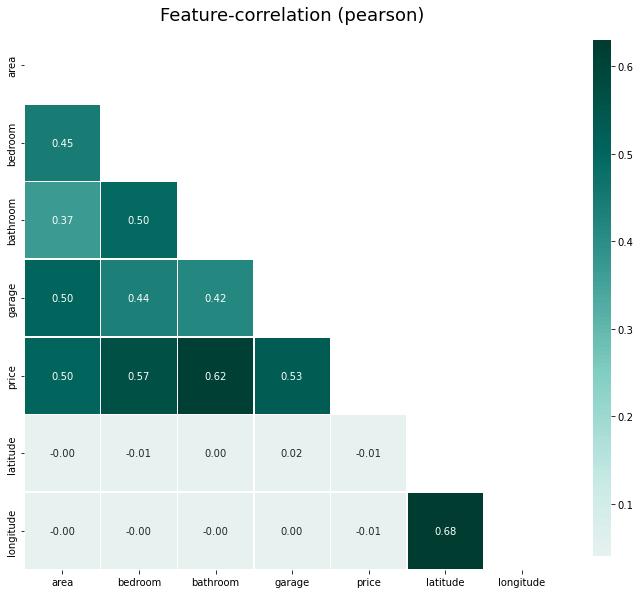

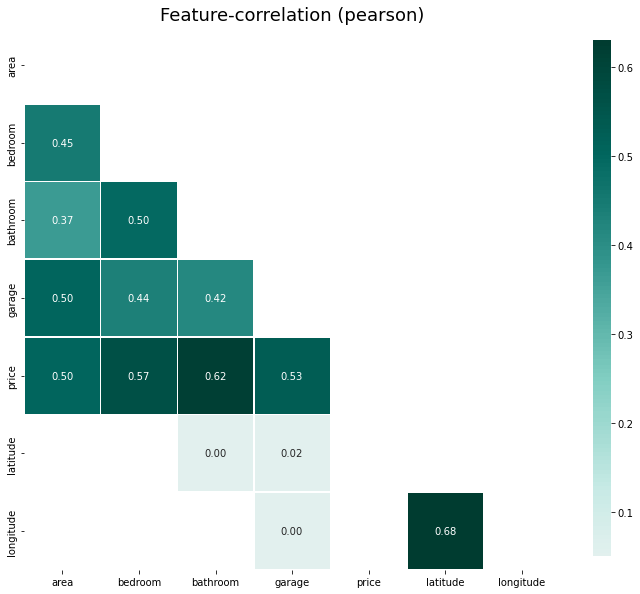

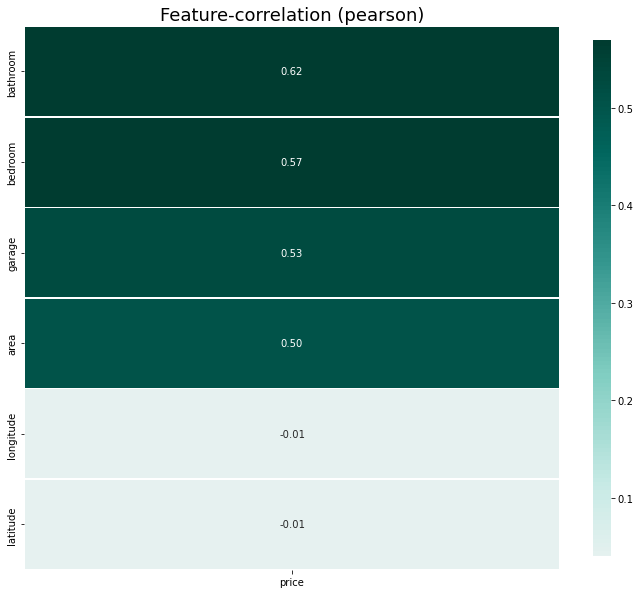

In [13]:
# Criando um gráfico de correlação das features do dataframe
klib.corr_plot(train_set_df)
klib.corr_plot(train_set_df, split='pos')
# klib.corr_plot(train_set_df, split='neg')
klib.corr_plot(train_set_df, target='price')

In [14]:
# Mostrando os valores de correlação entre as features do dataframe e o preço
correlation_matrix['price'].sort_values(ascending = False)

price        1.000000
bathroom     0.618355
bedroom      0.566592
garage       0.528112
area         0.502783
longitude   -0.005600
latitude    -0.008520
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bathroom', ylabel='price'>,
        <AxesSubplot:xlabel='bedroom', ylabel='price'>,
        <AxesSubplot:xlabel='garage', ylabel='price'>,
        <AxesSubplot:xlabel='area', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='bathroom'>,
        <AxesSubplot:xlabel='bathroom', ylabel='bathroom'>,
        <AxesSubplot:xlabel='bedroom', ylabel='bathroom'>,
        <AxesSubplot:xlabel='garage', ylabel='bathroom'>,
        <AxesSubplot:xlabel='area', ylabel='bathroom'>],
       [<AxesSubplot:xlabel='price', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bathroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bedroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='garage', ylabel='bedroom'>,
        <AxesSubplot:xlabel='area', ylabel='bedroom'>],
       [<AxesSubplot:xlabel='price', ylabel='garage'>,
        <AxesSubplot:xlabel='bathroom', ylabel='garage'>,
        <AxesSubplot:xlabel='bedro

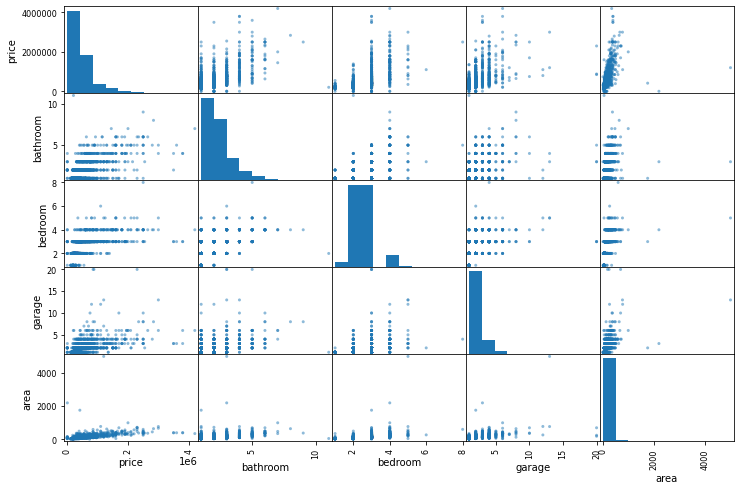

In [15]:
# Selecionando atributos (features) de interesse para plotar o gráfico de dispersão de correlação
attributes = ["price", "bathroom", "bedroom", "garage", "area"]

scatter_matrix(train_set_df[attributes], figsize=(12, 8))

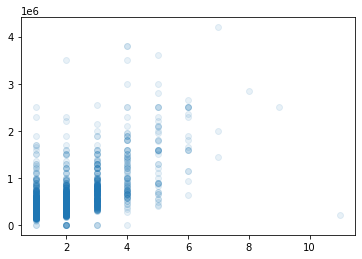

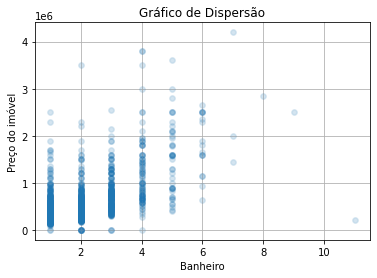

In [16]:
plt.scatter(train_set_df['bathroom'], train_set_df['price'], alpha = 0.1)
train_set_df.plot(kind="scatter", x="bathroom", y="price",
alpha=0.1)

# Gráfico usando plt.plot
x = train_set_df['bathroom']
y = train_set_df['price']
plt.plot(x, y, 'o', alpha = 0.1)
plt.xlabel('Banheiro')
plt.ylabel('Preço do imóvel')
plt.title('Gráfico de Dispersão')
plt.grid()

In [17]:
# Criando nova feature bathroom_per_bedroom (quantidade de banheiros por quarto) e verificando se a correlação entre ela e o preço está satisfatória
train_set_df['bathroom_per_bedroom'] = train_set_df['bathroom']/train_set_df['bedroom']

correlation_matrix_new = train_set_df.corr()
correlation_matrix_new['price'].sort_values(ascending = False)

price                   1.000000
bathroom                0.618355
bedroom                 0.566592
garage                  0.528112
area                    0.502783
bathroom_per_bedroom    0.332517
longitude              -0.005600
latitude               -0.008520
Name: price, dtype: float64

## 4. Preparação dos Dados para Modelagem 

### 4.1. Limpeza dos dados

In [18]:
# Copiando o dataset de treino e removendo a variavel target price
train_set_df = train_set.drop(['price'], axis = 1)
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 3176 to 2667
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1788 non-null   object 
 1   area                  1788 non-null   float64
 2   bedroom               1788 non-null   float64
 3   bathroom              1788 non-null   float64
 4   garage                1661 non-null   float64
 5   latitude              1787 non-null   float64
 6   longitude             1787 non-null   float64
 7   bathroom_per_bedroom  1788 non-null   float64
dtypes: float64(7), object(1)
memory usage: 125.7+ KB


In [19]:
# Criando uma série de dados de preço para o dataset de treino
train_set_df_labels = train_set['price'].copy()
train_set_df_labels

3176     285000.0
2613    1300000.0
3585     240000.0
3513     300000.0
4182    1800000.0
          ...    
3720     930000.0
2964     175000.0
3008     700000.0
3217     216000.0
2667     320000.0
Name: price, Length: 1788, dtype: float64

In [20]:
# Verificando o total de features nulas do dataset de treino
missing_values = train_set_df.isnull().sum()
missing_values

type                      0
area                      0
bedroom                   0
bathroom                  0
garage                  127
latitude                  1
longitude                 1
bathroom_per_bedroom      0
dtype: int64

GridSpec(6, 6)

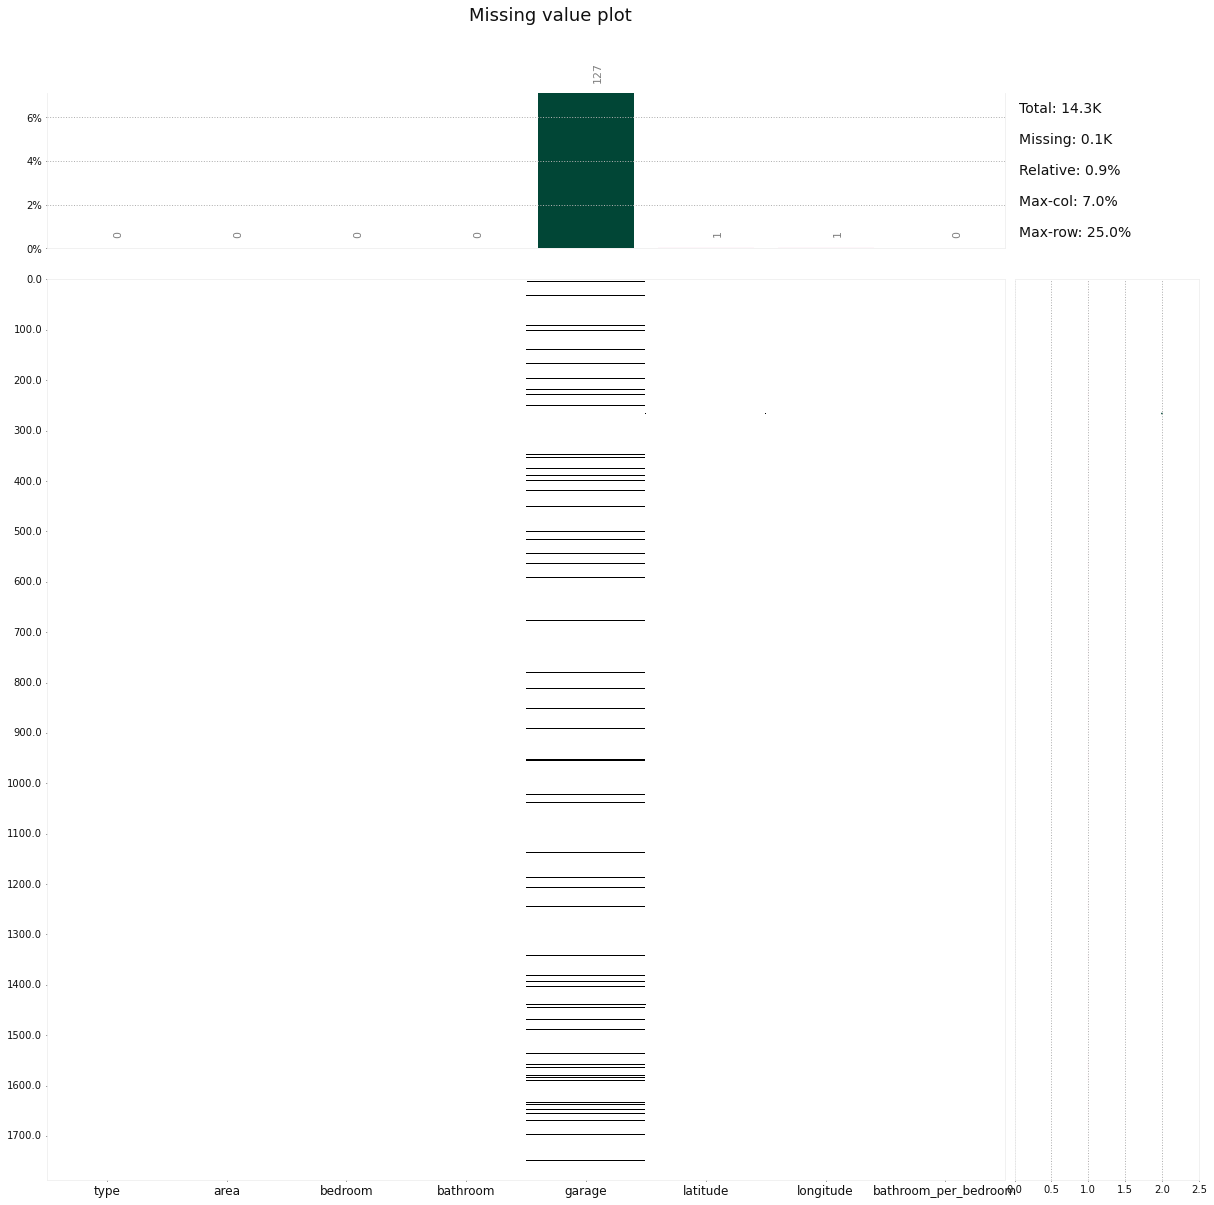

In [21]:
# Plotando gráfico para visualizar a quantidade de features nulas
klib.missingval_plot(train_set_df)

In [22]:
# Pegando apenas os dados numericos do dataset de treino
train_set_df_numeric = train_set_df.select_dtypes(include=[np.number])

In [23]:
# Removendo todos os dados nulos do dataset de treino utilizando o SimpleInputer

imputer = SimpleImputer(strategy="median")

imputer.fit(train_set_df_numeric)

X = imputer.transform(train_set_df_numeric)

train_set_df_imputed = pd.DataFrame(X, columns=train_set_df_numeric.columns, index = train_set_df_numeric.index)

train_set_df_imputed.isnull().sum()

area                    0
bedroom                 0
bathroom                0
garage                  0
latitude                0
longitude               0
bathroom_per_bedroom    0
dtype: int64

### 4.2. Manipulando features categóricas

In [24]:
# Informações sobre o dataset de treino original
train_set_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 3176 to 2667
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1788 non-null   object 
 1   area                  1788 non-null   float64
 2   bedroom               1788 non-null   float64
 3   bathroom              1788 non-null   float64
 4   garage                1661 non-null   float64
 5   latitude              1787 non-null   float64
 6   longitude             1787 non-null   float64
 7   bathroom_per_bedroom  1788 non-null   float64
dtypes: float64(7), object(1)
memory usage: 125.7+ KB


In [25]:

# Informaçõe sobre o dataset imputado
train_set_df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 3176 to 2667
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  1788 non-null   float64
 1   bedroom               1788 non-null   float64
 2   bathroom              1788 non-null   float64
 3   garage                1788 non-null   float64
 4   latitude              1788 non-null   float64
 5   longitude             1788 non-null   float64
 6   bathroom_per_bedroom  1788 non-null   float64
dtypes: float64(7)
memory usage: 111.8 KB


In [26]:
# Visualizando a variavel categorica type
train_set_df_categorical = train_set_df[["type"]]
train_set_df_categorical.head(10)

,type
3176,Apartamento
2613,Apartamento
3585,Apartamento
3513,Apartamento
4182,Casa
3437,Apartamento
2907,Apartamento
3581,Apartamento
3013,Apartamento
2422,Apartamento


In [27]:
# Utilizando o OneHotEncoder para manipulação da feature categórica type 
# Neste caso iremos separar os tipos de imóveis em duas colunas numericas: 1 para casa e 0 para apartamento

categorical_encoder = OneHotEncoder()
train_set_df_categorical_encoded = categorical_encoder.fit_transform(train_set_df_categorical)
train_set_df_categorical_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### 4.3. Feature Scaling - Pipeline de transformação

In [28]:
# Criando uma pipeline de transformação númerica para preencher todos os dados faltantes pela média da coluna e colocar os dados na mesma escala

pipeline_numeric = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ('std_scaler', StandardScaler())
])

train_set_df_numeric_transformed = pipeline_numeric.fit_transform(train_set_df_numeric)
train_set_df_numeric_transformed

array([[-0.39505918, -0.82530118,  0.09191186, ...,  0.02077038,
        -0.06860475,  0.73800738],
       [ 1.00508899,  0.58140855, -0.79640389, ...,  0.01478594,
        -0.05728922, -1.119837  ],
       [-0.47251419, -0.82530118, -0.79640389, ...,  0.01891625,
        -0.06019319, -0.6553759 ],
       ...,
       [ 0.004132  ,  0.58140855,  0.09191186, ..., -0.19364472,
         0.80159211, -0.19091481],
       [-0.48443034, -0.82530118, -0.79640389, ...,  0.01478594,
        -0.05728922, -0.6553759 ],
       [-0.37718495, -0.82530118,  0.98022762, ..., -1.91021132,
        -1.5910808 ,  2.13139066]])

In [29]:
# Criando uma pipeline de transformação categorica para transformar os tipos de imóveis em duas colunas numericas
# Neste ponto tambem iremos remover os dados faltantes dos valores numericos novamente e colocar os dados na mesma escala

numeric_attrs = list(train_set_df_numeric)
categorical_attrs = ["type"]

full_pipeline = ColumnTransformer([
    ("num", pipeline_numeric, numeric_attrs),
    ("cat", OneHotEncoder(), categorical_attrs),
])

train_set_df_prepared = full_pipeline.fit_transform(train_set_df)
train_set_df_prepared

array([[-0.39505918, -0.82530118,  0.09191186, ...,  0.73800738,
         1.        ,  0.        ],
       [ 1.00508899,  0.58140855, -0.79640389, ..., -1.119837  ,
         1.        ,  0.        ],
       [-0.47251419, -0.82530118, -0.79640389, ..., -0.6553759 ,
         1.        ,  0.        ],
       ...,
       [ 0.004132  ,  0.58140855,  0.09191186, ..., -0.19091481,
         0.        ,  1.        ],
       [-0.48443034, -0.82530118, -0.79640389, ..., -0.6553759 ,
         1.        ,  0.        ],
       [-0.37718495, -0.82530118,  0.98022762, ...,  2.13139066,
         1.        ,  0.        ]])

## 5. Modelagem

### 5.1. Treinamento do modelo

In [30]:
# Treinando o modelo de regressão linear utilizando o algoritmo DecisionTreeRegressor
model_regression = DecisionTreeRegressor()
model_regression.fit(train_set_df_prepared, train_set_df_labels)

DecisionTreeRegressor()

In [31]:
values_transformed = [[-0.39505918, -0.82530118, 0.09191186, 0.00531812, 0.02077038, -0.06860475, 0.73800738, 1.0, 0.0]]
model_regression.predict(values_transformed)

array([285000.])

### 5.2. Avaliação de desempenho com todos os dados

In [32]:
# Avaliando o modelo utilizando o RMSE (Root Mean Square Error)
price_predictions = model_regression.predict(train_set_df_prepared)
tree_mse = mean_squared_error(train_set_df_labels, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

53193.19317630981

### 5.3. Treinamento e avaliação de desempenho com separação de treino e teste

In [33]:
# Separando os dados em treino e teste para treinar um novo modelo

X = train_set_df_prepared
y = train_set_df_labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Treinando novamente o modelo de regressão linear, porém com os dados de treino e teste separados

model_regression_2 = DecisionTreeRegressor()
model_regression_2.fit(X_train, y_train)

y_pred = model_regression_2.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

350931.2708571182

### 5.4. Validação cruzada

In [35]:
# Validando o modelo com todos os dados do dataset de treino

scores = cross_val_score(model_regression, train_set_df_prepared, train_set_df_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([279002.85239471, 243569.97903098, 322858.40431928, 310843.42805027,
       315902.59387504, 361034.83332269, 341430.1099764 , 386241.21464987,
       353036.88309891, 333786.63264949])

In [36]:
# Validando o modelo com os dados do dataset de treino separados
scores = cross_val_score(model_regression_2, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

tree_rmse_scores

array([382312.10798596, 283269.11700754, 259636.17302244, 379724.63865406,
       308599.72891531, 244397.80662161, 298562.67252033, 327925.04380668,
       454220.30948373, 344671.65020708])

## 6. Salvando o modelo

In [37]:
# Copiando o dataset de treino transformado para um novo dataset e voltando a variavel target preço
df_deploy = train_set_df.copy()
df_deploy['price'] = train_set['price']
df_deploy

,type,area,bedroom,bathroom,garage,latitude,longitude,bathroom_per_bedroom,price
3176,Apartamento,73.0,2.0,2.0,2.0,-21.777785,-46.619565,1.000000,285000.0
2613,Apartamento,308.0,3.0,1.0,2.0,-21.808696,-46.576769,0.333333,1300000.0
3585,Apartamento,60.0,2.0,1.0,2.0,-21.787362,-46.587752,0.500000,240000.0
3513,Apartamento,87.0,3.0,1.0,1.0,-21.808696,-46.576769,0.333333,300000.0
4182,Casa,500.0,4.0,5.0,3.0,-22.118815,-46.683995,1.250000,1800000.0
...,...,...,...,...,...,...,...,...,...
3720,Casa,330.0,4.0,6.0,4.0,-23.014179,-45.574445,1.500000,930000.0
2964,Apartamento,60.0,2.0,1.0,1.0,-23.675205,-46.432621,0.500000,175000.0
3008,Casa,140.0,3.0,2.0,4.0,-22.885289,-43.328431,0.666667,700000.0
3217,Apartamento,58.0,2.0,1.0,2.0,-21.808696,-46.576769,0.500000,216000.0


In [38]:
# Salvando o dataset modificado para um arquivo csv
df_deploy.to_csv(f'{os.getcwd()}/../../src/datasets/deploy.csv', index = False, header=True)

In [42]:
# Salvando o modelo de machine learning para um arquivo sav
pickle.dump(model_regression, open('assets/final_model.sav', 'wb'))